Extracted Text:
A Bibliometric Analysis and Research Landscape of Artificial Intelligence in Education                     2024-25  
  
  
Dept. of CSE, Gubbi.  
Page 1  
  
  
Chapter 1:  
INTRODUCTION 
Artificial intelligence has emerged as a result of the ongoing advancements in computer 
and information transmission technology . The capacity of robots to mimic human intelligence 
in a variety of contexts, including learning from experience, solving problems, answering 
questions, developing strategies, and adapting to new environments, is known as artificial 
intelligence. 
Alternatively, Whitby stated that AI is the study of intelligent behavior in all forms of life 
with the goal of developing computer systems and associated technologies that mimic this 
behavior . This includes both animals and humans. Based on these definitions, it's clear that AI 
includes all the latest developments in information and communication technology as well as 
computers, computer-related technologi

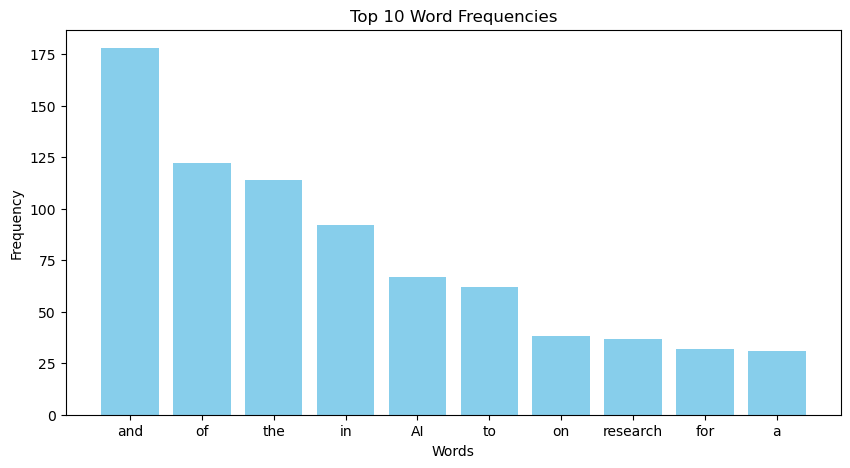

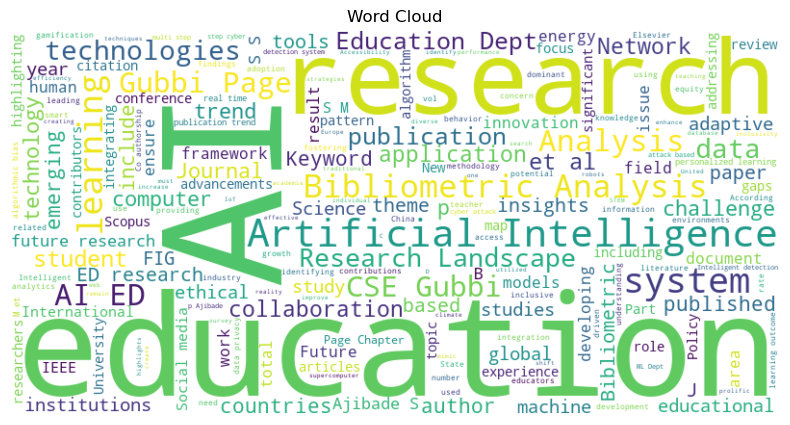

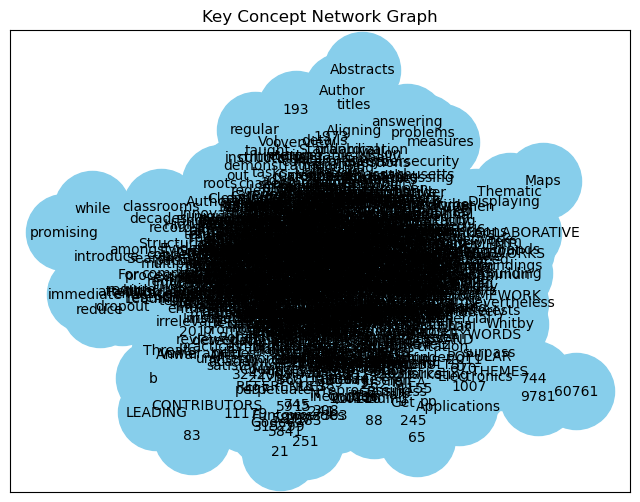

In [12]:
import re
import fitz
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import networkx as nx
import plotly.express as px
import plotly.graph_objects as go
from sumy.parsers.plaintext import PlaintextParser
from sumy.nlp.tokenizers import Tokenizer
from sumy.summarizers.lex_rank import LexRankSummarizer
from langdetect import detect
from langdetect.lang_detect_exception import LangDetectException
from sklearn.feature_extraction.text import TfidfVectorizer
from collections import Counter


%matplotlib inline
import plotly.io as pio
pio.renderers.default = 'notebook'  

#Preprocess text
def preprocess_text(text):
    text = re.sub(r'\s+', ' ', text)  # Remove extra spaces
    text = re.sub(r'\W+', ' ', text)  # Remove special characters
    return text.strip()

#Extract text from PDF
def extract_text_from_pdf(file_path):
    text = ""
    with fitz.open(file_path) as pdf_file:
        for page in pdf_file:
            text += page.get_text()
    return text

file_path =r"D:\7th sem\techincal seminar\Technical_seminar_report nithin.pdf" 
text = extract_text_from_pdf(file_path)
print("Extracted Text:")
print(text)
#Summarize text using LexRank
def summarize_text(text, num_sentences=4, language="english"):
    try:
        # Check language support
        detected_language = detect(text)
        if detected_language != language:
            print(f"Warning: Detected language is '{detected_language}', but summarization is set to '{language}'.")
        
        parser = PlaintextParser.from_string(text, Tokenizer(language))
        summarizer = LexRankSummarizer()
        summary = summarizer(parser.document, num_sentences)
        return " ".join(str(sentence) for sentence in summary)
    except LangDetectException:
        return "Error: Unable to detect language."

# Adjust summary length based on percentage
def adjust_length_by_percentage(text, percentage):
    total_sentences = text.count('.') + text.count('!') + text.count('?')
    num_sentences = max(1, int(total_sentences * (percentage / 100)))
    return num_sentences

# Visualization: Bar Chart of Word Frequencies
def visualize_word_frequencies(summary_text):
    words = summary_text.split()
    word_counts = Counter(words)
    common_words = word_counts.most_common(10)
    words, counts = zip(*common_words)
    
    plt.figure(figsize=(10, 5))
    plt.bar(words, counts, color='skyblue')
    plt.title("Top 10 Word Frequencies")
    plt.xlabel("Words")
    plt.ylabel("Frequency")
    plt.show()

# Visualization: Word Cloud
def visualize_word_cloud(summary_text):
    wordcloud = WordCloud(width=800, height=400, background_color="white").generate(summary_text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title("Word Cloud")
    plt.show()

# Visualization: Network Graph for Key Concepts
def visualize_network_graph(summary_text):
    words = summary_text.split()
    word_pairs = [(words[i], words[i + 1]) for i in range(len(words) - 1)]
    
    G = nx.Graph()
    G.add_edges_from(word_pairs)
    
    plt.figure(figsize=(8, 6))
    nx.draw_networkx(G, with_labels=True, node_color="skyblue", edge_color="gray", node_size=3000, font_size=10)
    plt.title("Key Concept Network Graph")
    plt.show()

# Interactive Visualization: Word Cloud with Plotly
def interactive_word_cloud(summary_text):
    word_counts = Counter(summary_text.split())
    words, frequencies = zip(*word_counts.items())
    fig = px.bar(x=words, y=frequencies, title="Interactive Word Frequencies", labels={'x': 'Words', 'y': 'Frequency'})
    fig.show()

# Interactive Visualization: Bar Chart with Hover Effects
def interactive_bar_chart(summary_text):
    words = summary_text.split()
    word_counts = Counter(words)
    common_words = word_counts.most_common(10)
    words, counts = zip(*common_words)
    
    fig = go.Figure(data=[go.Bar(x=words, y=counts, marker=dict(color="lightblue"), text=counts, textposition="auto")])
    fig.update_layout(title="Interactive Bar Chart", xaxis_title="Words", yaxis_title="Frequency")
    fig.show()

file_path =r"D:\7th sem\techincal seminar\Technical_seminar_report nithin.pdf"   # Replace with your PDF file path
text = extract_text_from_pdf(file_path)
text = preprocess_text(text)

# Detect language
try:
    detected_language = detect(text)
    print(f"Detected language: {detected_language}")
except LangDetectException:
    print("Error: Unable to detect language.")

# Summarization
num_sentences = 5  # Modify as needed
summary = summarize_text(text, num_sentences=num_sentences, language=detected_language)
print("\nGenerated Summary:\n")
print(summary)

# Visualizations
print("\nGenerating visualizations...")
visualize_word_frequencies(summary)
visualize_word_cloud(summary)
visualize_network_graph(summary)
interactive_word_cloud(summary)
interactive_bar_chart(summary)


In [2]:
!pip install pymupdf


   ---------------------------------------- 0.0/16.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/16.6 MB ? eta -:--:--
    --------------------------------------- 0.3/16.6 MB ? eta -:--:--
   - -------------------------------------- 0.5/16.6 MB 1.5 MB/s eta 0:00:11
   - -------------------------------------- 0.8/16.6 MB 1.3 MB/s eta 0:00:13
   -- ------------------------------------- 1.0/16.6 MB 1.4 MB/s eta 0:00:11
   -- ------------------------------------- 1.0/16.6 MB 1.4 MB/s eta 0:00:11
   --- ------------------------------------ 1.3/16.6 MB 1.0 MB/s eta 0:00:16
   --- ------------------------------------ 1.3/16.6 MB 1.0 MB/s eta 0:00:16
   --- ------------------------------------ 1.3/16.6 MB 1.0 MB/s eta 0:00:16
   --- ------------------------------------ 1.3/16.6 MB 1.0 MB/s eta 0:00:16
   --- ------------------------------------ 1.6/16.6 MB 704.7 kB/s eta 0:00:22
   ---- ----------------------------------- 1.8/16.6 MB 751.1 kB/s eta 0:00:20
   ----- -------

In [4]:
!pip install wordcloud

  Using cached wordcloud-1.9.4-cp312-cp312-win_amd64.whl.metadata (3.5 kB)
Using cached wordcloud-1.9.4-cp312-cp312-win_amd64.whl (301 kB)


In [6]:
!pip install sumy


  Using cached sumy-0.11.0-py2.py3-none-any.whl.metadata (7.5 kB)
  Using cached docopt-0.6.2-py2.py3-none-any.whl
  Using cached breadability-0.1.20-py2.py3-none-any.whl
  Using cached pycountry-24.6.1-py3-none-any.whl.metadata (12 kB)
Using cached sumy-0.11.0-py2.py3-none-any.whl (97 kB)
Using cached pycountry-24.6.1-py3-none-any.whl (6.3 MB)


In [8]:
!pip install langdetect

  Using cached langdetect-1.0.9-py3-none-any.whl


In [10]:
import nltk
nltk.download('punkt')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\nithi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [11]:
nltk.download('punkt_tab')


[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\nithi\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt_tab.zip.


True